## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/planet-understanding-the-amazon-from-space/'

In [4]:
ls {PATH}

__MACOSX/                 subm/                       test_v2_file_mapping.csv
models/                   test-jpg/                   tmp/
ruBya5z73Y5Ea6            test-jpg-additional/        train-jpg/
ruBya5z73Y5Ea6.1          test-jpg-additional.tar     train_v2.csv
sample_submission_v2.csv  test-jpg-additional.tar.7z


## Multi-label versus single-label classification

In [5]:
from fastai.plots import *

In [6]:
def get_1st(path): return glob(f'{path}/*.*')[0]

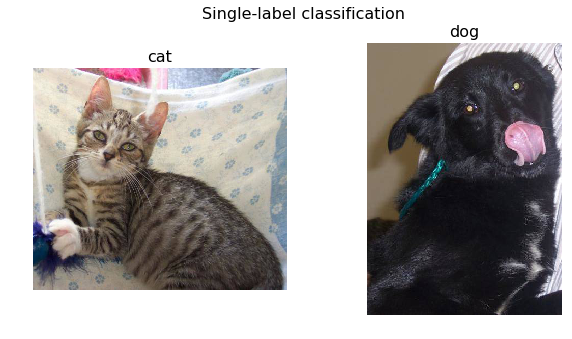

In [7]:
dc_path = "data/dogscats/valid/"
list_paths = [get_1st(f"{dc_path}cats"), get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-label classification")

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

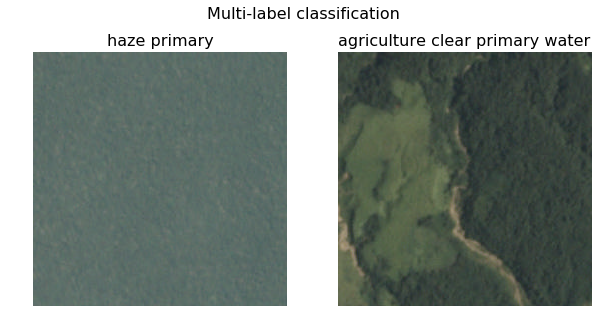

In [8]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [9]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [10]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [11]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [12]:
data = get_data(256)

In [13]:
x,y = next(iter(data.val_dl))

In [14]:
y[0]


 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 1
[torch.cuda.FloatTensor of size 17 (GPU 0)]

In [15]:
list(zip(data.classes, y[1]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 1.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 1.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 0.0)]

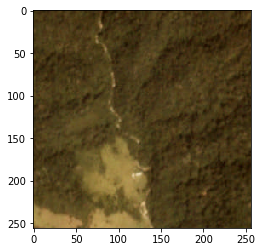

In [16]:
plt.imshow(data.val_ds.denorm(to_np(x))[1]*1.4);

In [17]:
sz=64

In [18]:
data = get_data(sz)

In [19]:
data = data.resize(int(sz*1.3), 'tmp')

In [20]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2                          
    0      0.234389   0.383744   0.787728  



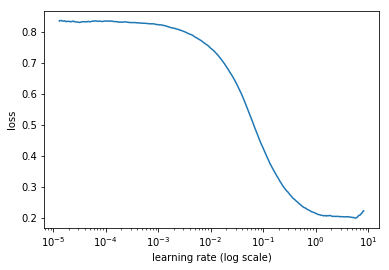

In [21]:
lrf=learn.lr_find()
learn.sched.plot()

In [21]:
lr = 0.2

In [23]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.1479     0.134173   0.880964  
    1      0.142297   0.127934   0.888712                    
    2      0.137374   0.125746   0.890616                    
    3      0.137776   0.125511   0.891048                    
    6      0.129992   0.121885   0.894482                    



[array([0.12188]), 0.8944815053210415]

In [22]:
lrs = np.array([lr/9,lr/3,lr])

In [23]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  8%|▊         | 42/506 [00:07<01:21,  5.67it/s, loss=0.639]


KeyboardInterrupt: 

In [26]:
learn.save(f'{sz}')

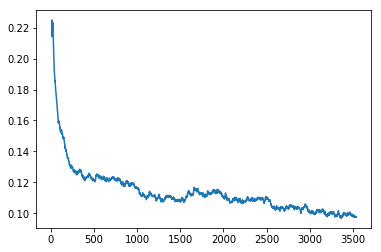

In [27]:
learn.sched.plot_loss()

In [28]:
sz=128

In [29]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.097825   0.095587   0.917998  
    1      0.099279   0.093125   0.920809                     
    2      0.095406   0.092557   0.921056                     
    3      0.096549   0.092539   0.921512                     
    4      0.09729    0.0919     0.921569                     
    5      0.095187   0.091707   0.921412                     
    6      0.094963   0.091499   0.921869                     



[array([0.0915]), 0.9218686076981479]

In [30]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.094767   0.086724   0.927766  
    1      0.093187   0.086521   0.927451                     
    2      0.091292   0.084936   0.928755                     
    3      0.092377   0.088713   0.924277                     
    4      0.086752   0.085904   0.929687                     
    5      0.085217   0.083753   0.930226                     
    6      0.082568   0.084143   0.929498                     



In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.08806    0.087858   0.926135  
    1      0.090521   0.087124   0.92741                      
    2      0.089998   0.08656    0.927324                     
    3      0.088509   0.086767   0.927036                     
    4      0.09103    0.086013   0.928056                     
    5      0.086311   0.086162   0.92801                      
 88%|████████▊ | 446/506 [01:50<00:14,  4.05it/s, loss=0.0853]

In [33]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.087841   0.08289    0.930118  
    2      0.081902   0.081559   0.932946                     
    3      0.085438   0.083948   0.930133                     
    4      0.081586   0.082711   0.932041                     
    5      0.080364   0.080886   0.933276                     
    6      0.078513   0.08073    0.933933                     



In [49]:
sz=256
data = get_data(sz)
data = data.resize(int(sz*1.3), 'tmp')

In [50]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
learn.load(f'{sz}')

In [51]:
test_log_preds, y = learn.TTA(is_test=True)
probs = np.exp(test_log_preds)

In [52]:
val_multi_preds, val_y = learn.TTA()
val_preds = np.mean(val_multi_preds, 0)

In [56]:
print(val_preds[0])
print(val_y[0])
#threshold = opt_h(val_preds, val_y)
#print(threshold)
f2(val_preds,val_y)

[0.68936 0.00411 0.03295 0.00165 0.00094 0.99911 0.00026 0.00049 0.28985 0.04569 0.00054 0.00055 0.99888
 0.28085 0.0071  0.0098  0.80803]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]


0.9310459671460737

In [57]:
test_preds = np.mean(test_log_preds, 0)

In [58]:
threshold = 0.17
pred_tags = []
for pred in test_preds:
    result = zip(data.classes, pred)
    tags = []
    for tag, prob in result:
        if prob > threshold:
            tags.append(tag)
    pred_tags.append(str(tags).strip('[]').replace("'", "").replace(",", ""))
pred_tags[0]

'agriculture cultivation partly_cloudy primary'

In [59]:
filenames = [o[9:-4] for o in data.test_ds.fnames]
fileindexes = [int(o[14:-4]) for o in data.test_ds.fnames]
print(fileindexes[0])

ds = pd.DataFrame(np.column_stack([fileindexes, filenames, pred_tags]), columns=['fileindexes', 'image_name', 'tags'])
ds[['fileindexes']] = ds[['fileindexes']].apply(pd.to_numeric)
ds = ds.sort_values('fileindexes')

25202


In [60]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
ds = ds.drop(columns = 'fileindexes')

In [63]:
name = f'{SUBM}subm-3.csv'
ds.to_csv(name, index=False, quoting=csv.QUOTE_NONE)

In [64]:
FileLink(name)

/home/kuptservol/fastai/courses/dl1/data/planet-understanding-the-amazon-from-space/subm/subm-3.csv

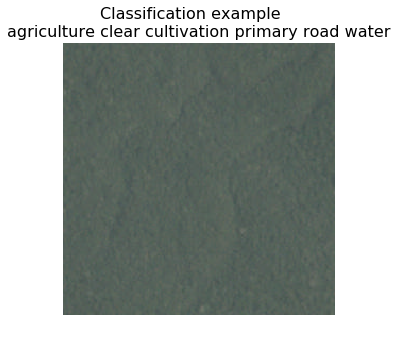

In [66]:
index = 200
vals = ds.get_values()[index]
plots_from_files([f"{PATH}test-jpg/test_"+str(index)+".jpg"], titles=[vals[1]], maintitle="Classification example")

### End